<a href="https://colab.research.google.com/github/conchincradle/autoencoder_perceptual_loss/blob/main/LPIPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[GitHub perceptual similarity](https://github.com/richzhang/PerceptualSimilarity)


In [ ]:
!pip install lpips
import cv2
import lpips
import torchvision.transforms as transforms
import torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 725 kB/s 


In [ ]:
import numpy as np
loss_fn_alex = lpips.LPIPS(net='alex')
transf = transforms.ToTensor()
img1 = cv2.imread("0g0.jpg")
img2 = cv2.imread("0g200.jpg")
img3 = cv2.imread("0g400.jpg")
img_tensor1 = transf(img1/255).to(torch.float32)
img_tensor2 = transf(img2/255).to(torch.float32)
img_tensor3 = transf(img3/255).to(torch.float32)
left = loss_fn_alex(img_tensor1,img_tensor2).item()
right = loss_fn_alex(img_tensor2,img_tensor3).item()


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.7/dist-packages/lpips/weights/v0.1/alex.pth


In [ ]:
print("LPIPS: left-{:.2f}, right-{:.2f}".format(left,right))

LPIPS: left-0.66, right-0.46


In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
n = 512
img=[0]*n
img_tensor=[0]*n
dis =[0]*(n-1)
loss_fn_alex = lpips.LPIPS(net='alex')
transf = transforms.ToTensor()
img[0]= cv2.resize(cv2.imread("0g0.jpg"),(224,224))
img_tensor[0] = transf(img[0]/255).to(torch.float32)
for i in range(1,n):
  name = "0g"+str(i)+".jpg"
  img[i]= cv2.imread(name)
  img_tensor[i] = transf(img[i]/255).to(torch.float32)
  dis[i-1] = loss_fn_alex(img_tensor[0],img_tensor[i]).item()
print(dis)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.7/dist-packages/lpips/weights/v0.1/alex.pth
[0.002988487482070923, 0.006052179262042046, 0.010369941592216492, 0.013702934607863426, 0.02202480472624302, 0.026727333664894104, 0.03427795320749283, 0.03837842494249344, 0.05837886035442352, 0.06980830430984497, 0.06383945047855377, 0.1013994887471199, 0.11524659395217896, 0.1253887414932251, 0.15970242023468018, 0.13927584886550903, 0.17773781716823578, 0.17283913493156433, 0.20579056441783905, 0.22938749194145203, 0.23006488382816315, 0.2505881190299988, 0.27859291434288025, 0.2626712918281555, 0.28375542163848877, 0.2789185047149658, 0.3081003427505493, 0.32854437828063965, 0.3228135108947754, 0.35501542687416077, 0.35398274660110474, 0.3705081641674042, 0.389985054731369, 0.36459386348724365, 0.4012036919593811, 0.38511088490486145, 0.4111311435699463, 0.4008548855781555, 0.4317885637283325, 0.4412199854850769, 0.43393465

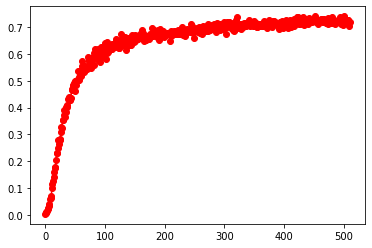

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(n-1),dis,"ro-",label="LPIPS")
plt.show()

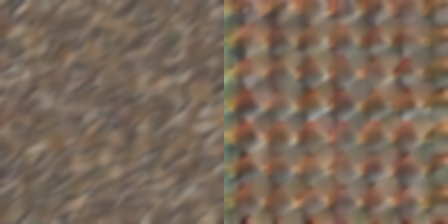

In [ ]:
img1_blur = cv2.GaussianBlur(img1,(11,11),0)
img2_blur = cv2.GaussianBlur(img2,(11,11),0)
img12_blur = np.hstack([img1_blur,img2_blur])
cv2_imshow(img12_blur)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

Loading model from: /usr/local/lib/python3.7/dist-packages/lpips/weights/v0.1/alex.pth


In [ ]:
img1_tensor = transf(img1/255).to(torch.float32)
img1_blur_tensor = transf(img1_blur/255).to(torch.float32)
img2_tensor = transf(img2/255).to(torch.float32)
img2_blur_tensor = transf(img2_blur/255).to(torch.float32)

In [ ]:
d1_blur = loss_fn_alex(img1_tensor,img2_tensor).item()
#d2_blur = loss_fn_alex(img2_tensor,img2_blur_tensor).item()

In [ ]:
#print("LPIPS distance between fake and blurred fake image: {:.2f}\nLPIPS distance between real and blurred real image: {:.2f}".format(d1_blur,d1_blur))
print("LPIPS distance: {:.3f}".format(d1_blur))

LPIPS distance: 0.307


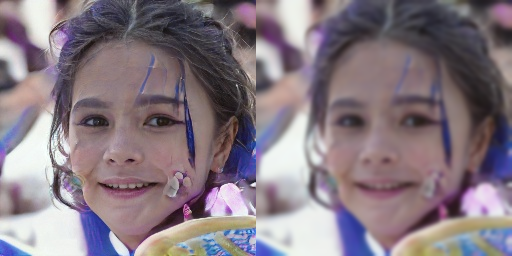

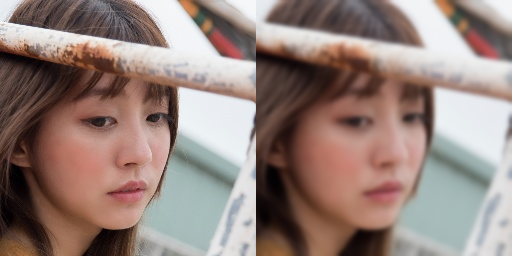

In [ ]:
img11_blur = np.hstack([img1,img1_blur])
img22_blur = np.hstack([img2,img2_blur])
cv2_imshow(img11_blur)
cv2_imshow(img22_blur)

In [ ]:
d12_blur = loss_fn_alex(img1_tensor,img2_blur_tensor).item()
d21_blur = loss_fn_alex(img2_tensor,img1_blur_tensor).item()
print("LPIPS distance between fake and blurred real image: {:.2f}\nLPIPS distance between real and blurred fake image: {:.2f}".format(d12_blur,d21_blur))

LPIPS distance between fake and blurred real image: 0.66
LPIPS distance between real and blurred fake image: 0.65
